In [47]:
# !pip install liac-arff
import numpy as np
import arff
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [36]:
with open('/content/drive/MyDrive/Colab Notebooks/column_2C_weka.arff','r') as f:
  dataset = arff.load(f)

In [37]:
data=dataset['data']
attributes = dataset['attributes']

In [38]:
df = pd.DataFrame(data, columns=[attr[0] for attr in attributes])

In [43]:
def preprocessing(col):
  if col=='Abnormal':
    col=1
  elif col=='Normal':
    col=0
  return col


In [44]:
df['class'] = df['class'].apply(preprocessing)

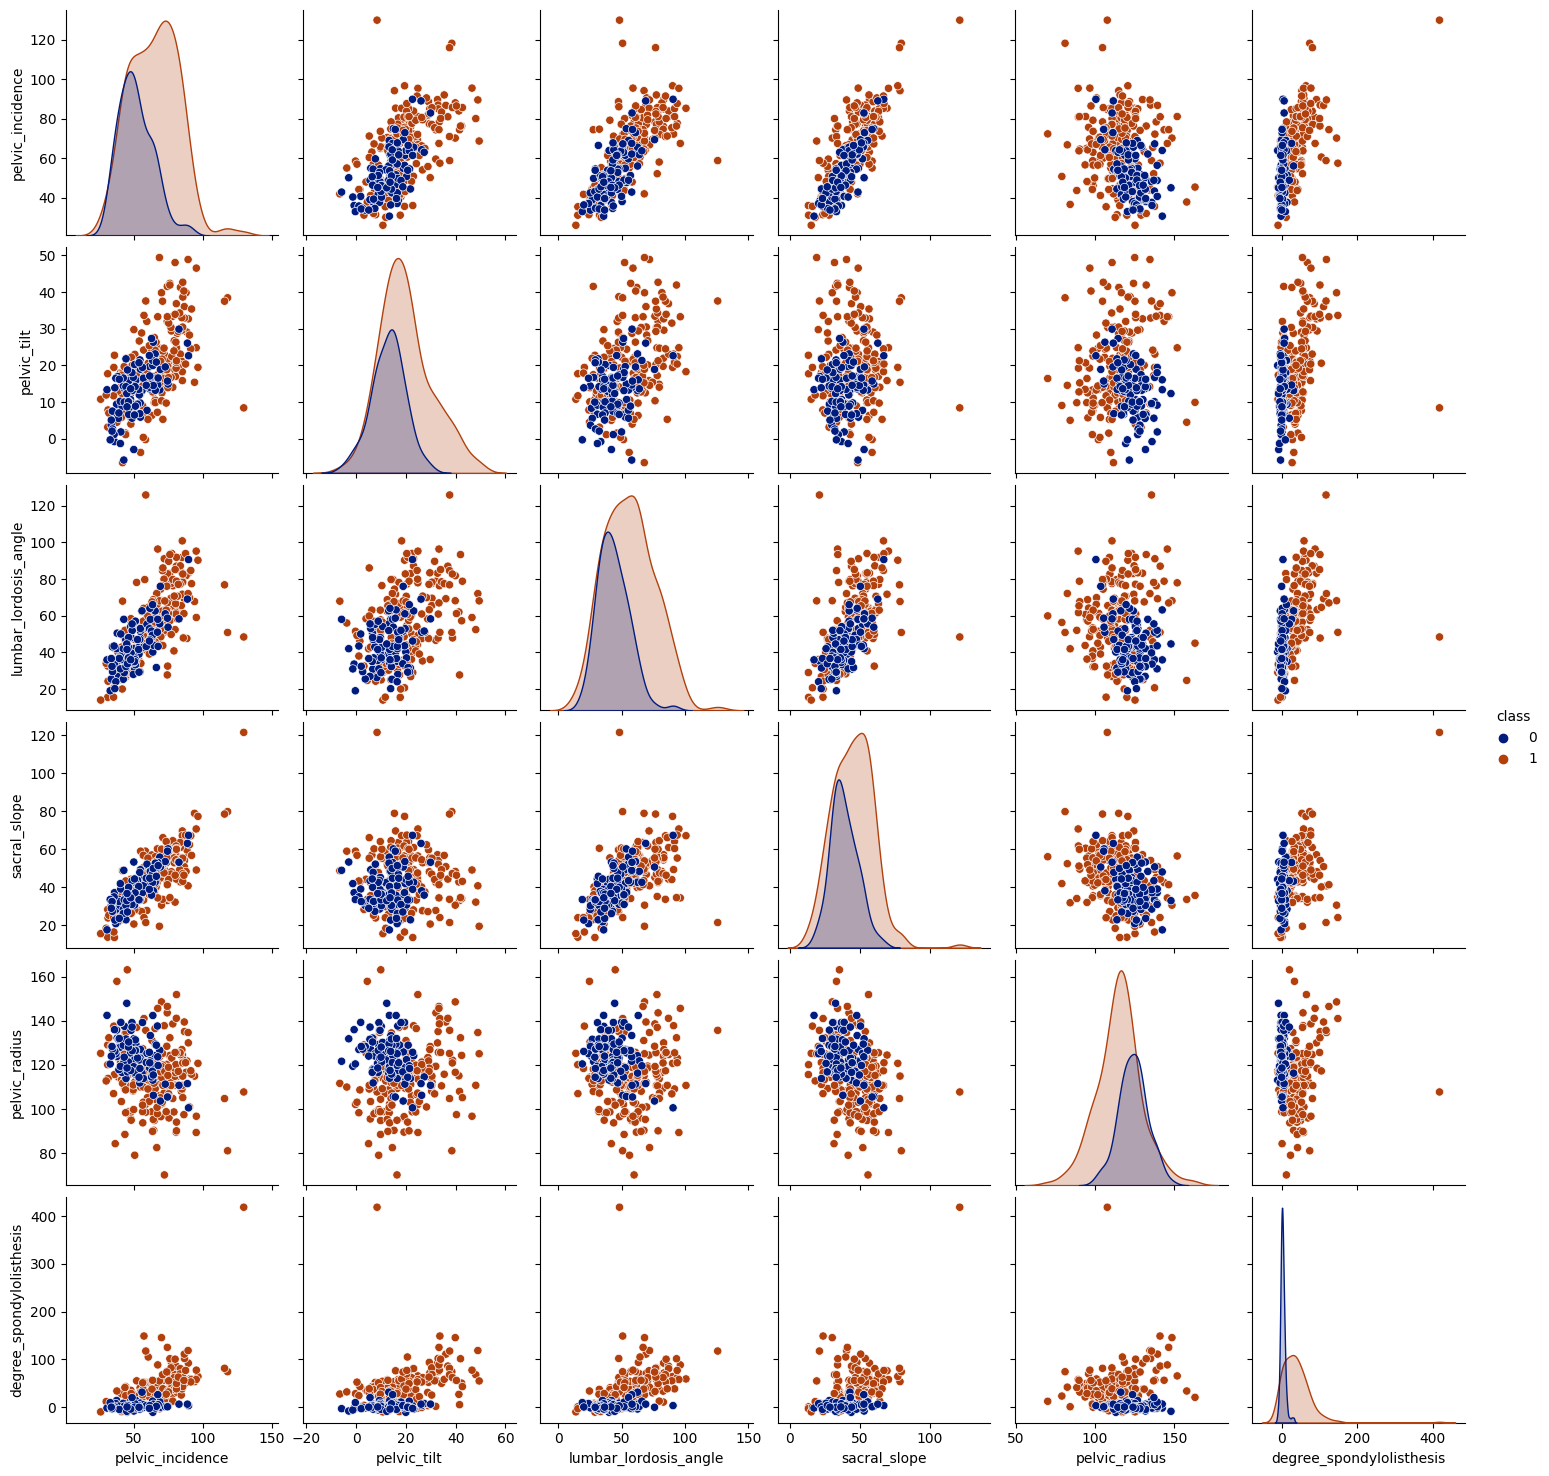

In [48]:
#Scatterplot for independent variable
sns.pairplot(df,hue='class',vars=['pelvic_incidence','pelvic_tilt','lumbar_lordosis_angle','sacral_slope','pelvic_radius','degree_spondylolisthesis'],palette='dark')


In [49]:
plt.show()

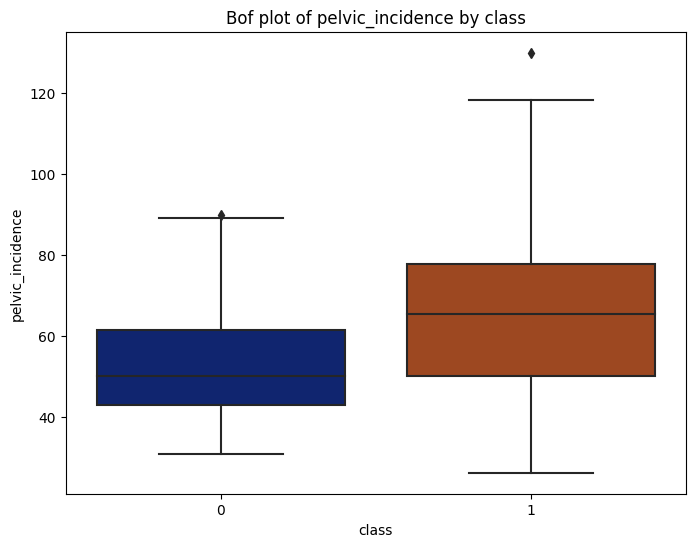

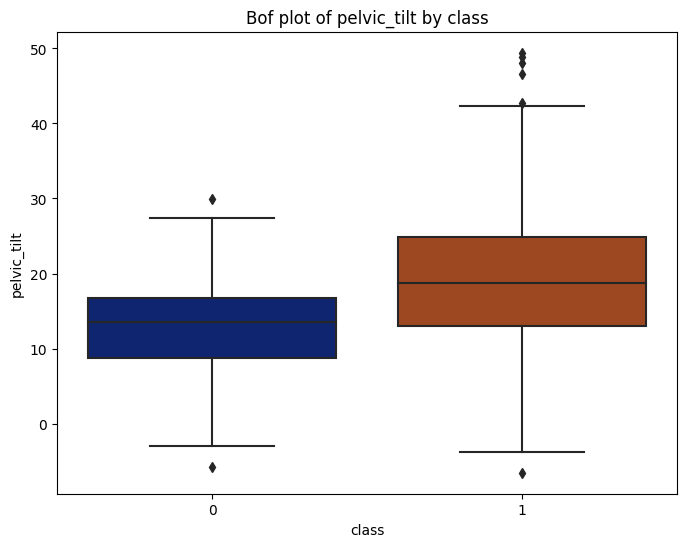

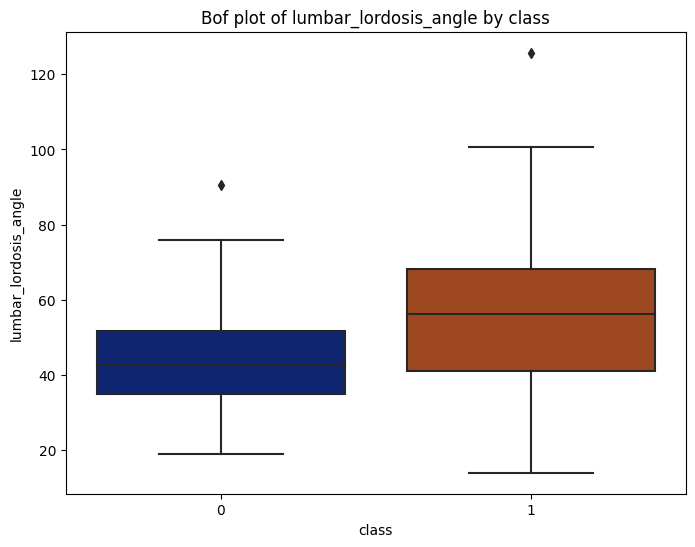

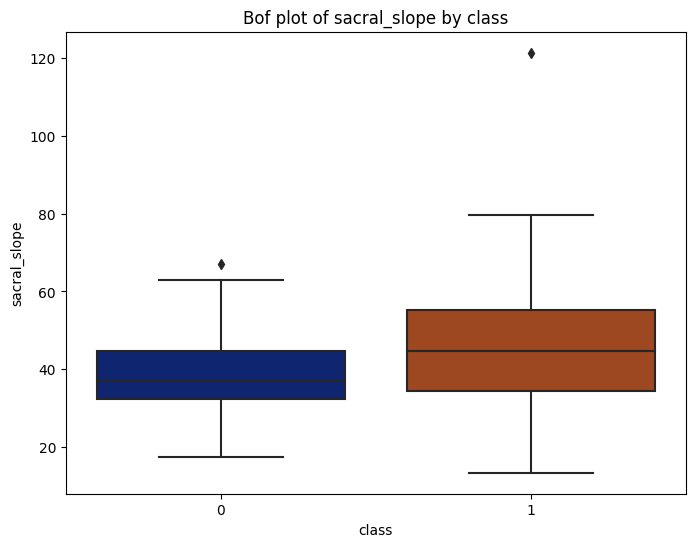

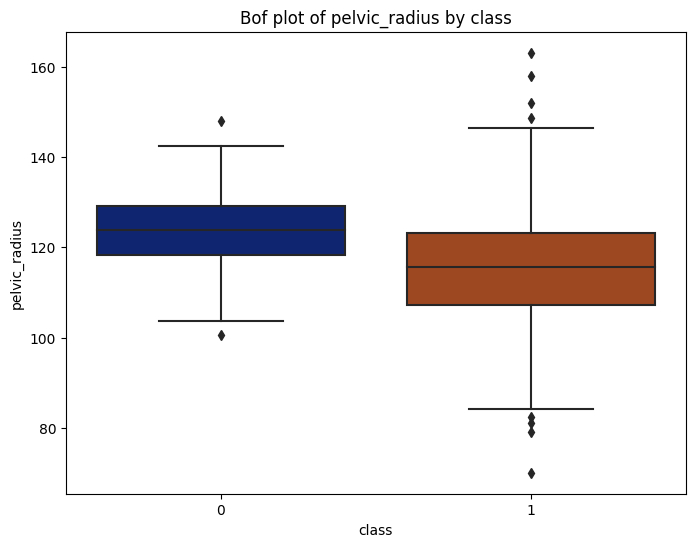

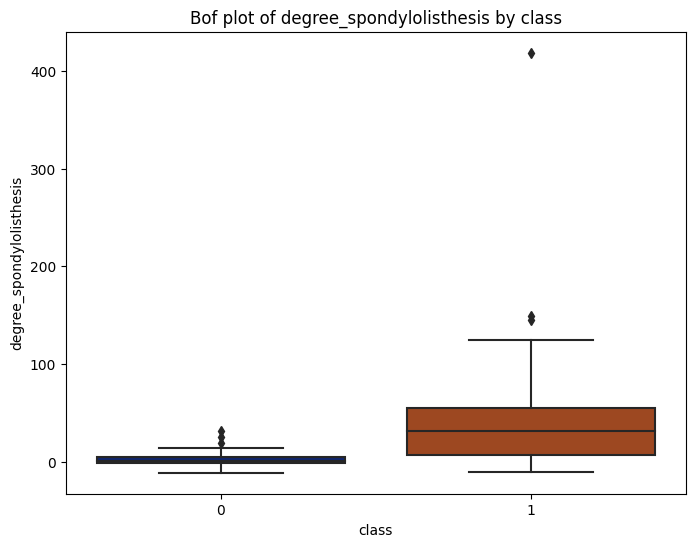

In [51]:
features=['pelvic_incidence','pelvic_tilt','lumbar_lordosis_angle','sacral_slope','pelvic_radius','degree_spondylolisthesis']

for f in features:
  plt.figure(figsize=(8,6))
  sns.boxplot(x='class',y=f,data=df,palette='dark')
  plt.title(f'Bof plot of {f} by class')
  plt.show()

In [52]:
train_class0 = df[df['class']==0].head(70)
train_class1 = df[df['class']==1].head(140)

train_data = pd.concat([train_class0,train_class1])

test_data = df.drop(train_data.index)

In [ ]:
# train_data

In [ ]:
# test_data

In [55]:
!pip3 install scikit-learn

In [60]:
x_train = train_data[features]
y_train = train_data['class']
x_test = test_data[features]
y_test = test_data['class']

In [81]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,f1_score,confusion_matrix,precision_score

In [69]:
train_errors=[]
test_errors=[]
k_values=[]
for n_neighbors in range(208,0,-3):
  k_values.append(n_neighbors)
  knn = KNeighborsClassifier(n_neighbors)
  knn.fit(x_train,y_train)

  y_train_pred = knn.predict(x_train)
  y_test_pred = knn.predict(x_test)

  train_error = 1 - accuracy_score(y_train,y_train_pred)
  test_error = 1 - accuracy_score(y_test,y_test_pred)
  train_errors.append(train_error)
  test_errors.append(test_error)


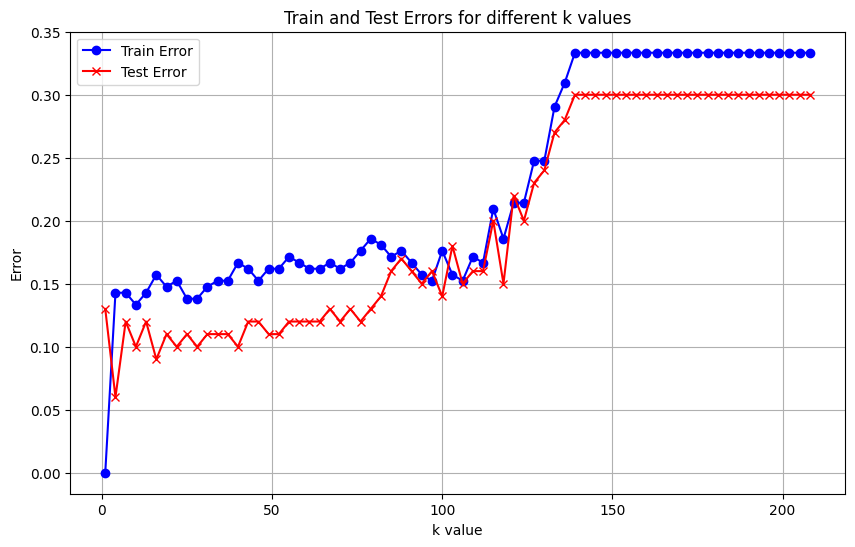

In [70]:
plt.figure(figsize=(10, 6))
plt.plot(k_values, train_errors, label='Train Error', color='blue', marker='o')
plt.plot(k_values, test_errors, label='Test Error', color='red', marker='x')
plt.title('Train and Test Errors for different k values')
plt.xlabel('k value')
plt.ylabel('Error')
plt.legend()
plt.grid(True)
plt.show()

In [75]:
#k_star = 4. The optimal k value is 4 from the graph where the test error is minimum

In [76]:
k=16

In [78]:
knn = KNeighborsClassifier(k)
knn.fit(x_train,y_train)

prediction = knn.predict(x_test)

In [83]:
tn, fp, fn, tp= confusion_matrix(y_true=y_test,y_pred=prediction).ravel()

In [89]:
f1_score=f1_score(y_true=y_test,y_pred=prediction)
print(f'f1_score: {f1_score: .2f}')

f1_score:  0.94


In [88]:
precision_score=precision_score(y_true=y_test,y_pred=prediction)
print(f'Precision: {precision_score: .2f}')

Precision:  0.89


In [85]:
tpr = tp / (tp + fn)
tnr = tn / (tn + fp)

print(f'True positive Rate: {tpr: .2f}')
print(f'True negative Rate: {tnr: .2f}')

True positive Rate:  1.00
True negative Rate:  0.70


In [94]:
dataLength=[]
k_length=[]
best_error=[]
for N in range(10,220,10):
  dataLength.append(N)
  error = 10000
  k_star=-1
  train_data_new_0 = train_data[train_data['class']==0].head(N//3)
  train_data_new_1 = train_data[train_data['class']==1].head(N-N//3)

  train_data_new = pd.concat([train_data_new_0,train_data_new_1])
  x_new_train = train_data_new[features]
  y_new_train = train_data_new['class']

  for _k in range(1,N+1,5):
    knn = KNeighborsClassifier(_k)
    knn.fit(x_new_train, y_new_train)

    prediction = knn.predict(x_test)
    test_error_new = 1-accuracy_score(y_test,prediction)
    if error>test_error_new:
      error = test_error_new
      k_star=_k
  k_length.append(k_star)
  best_error.append(error)




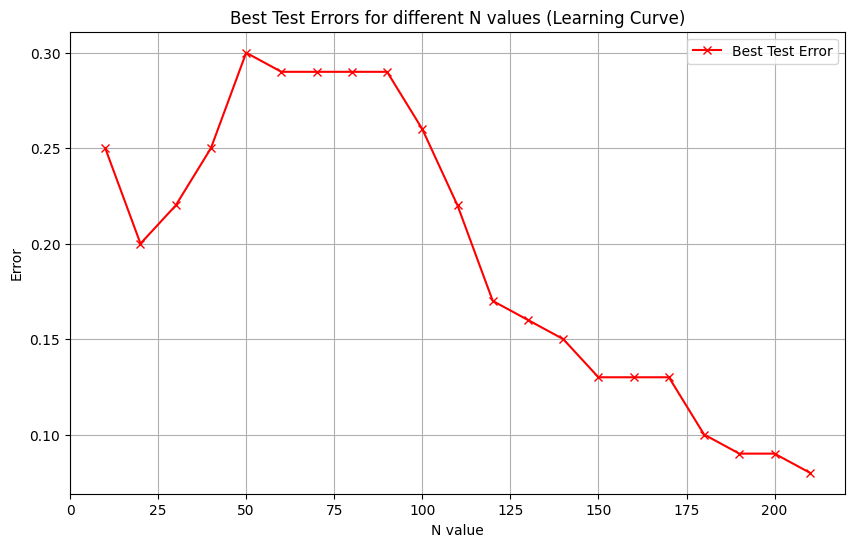

In [96]:
plt.figure(figsize=(10, 6))
plt.plot(dataLength, best_error, label='Best Test Error', color='red', marker='x')
plt.title('Best Test Errors for different N values (Learning Curve)')
plt.xlabel('N value')
plt.ylabel('Error')
plt.legend()
plt.grid(True)
plt.show()

In [97]:
#Manhattan distance
#x_test, y_test, x_train, y_train
errors=[]
k_list=[]

for _k in range(1,200,5):
  k_list.append(_k)
  knn = KNeighborsClassifier(n_neighbors=_k,p=1,metric="manhattan")

  knn.fit(x_train,y_train)

  y_pred = knn.predict(x_test)
  cur_error = 1 - accuracy_score(y_test, y_pred)

  errors.append(cur_error)


In [99]:
indices = [index for index,value in enumerate(errors) if value==min(errors)]

In [100]:
indices

[0, 1, 2, 5]

In [108]:
optimum_k_value = k_list[1]

In [112]:
def p_analysis( p_series, weighted = False):
    test_error_list = []

    for p in p_series:
        classifier = KNeighborsClassifier(n_neighbors=optimum_k_value, p=p, metric="minkowski")
        classifier.fit(x_train, y_train)
        testing_error = 1 - accuracy_score(y_test, classifier.predict(x_test))
        test_error_list.append(testing_error)

    return {
        "P": p_series,
        "log10(p)": np.linspace(0.1, 1, 10),
        "test_error_list": test_error_list
    }

In [113]:
collect_p_analysis = p_analysis(np.logspace(0.1, 1, 10))
p_analysis_df = pd.DataFrame(collect_p_analysis)
p_analysis_df


,P,log10(p),test_error_list
0,1.258925,0.1,0.09
1,1.584893,0.2,0.09
2,1.995262,0.3,0.08
3,2.511886,0.4,0.08
4,3.162278,0.5,0.08
5,3.981072,0.6,0.06
6,5.011872,0.7,0.07
7,6.309573,0.8,0.08
8,7.943282,0.9,0.09
9,10.000000,1.0,0.09


In [114]:
min_test_error = p_analysis_df["test_error_list"].min()
p_analysis_df[p_analysis_df["test_error_list"] == min_test_error]


,P,log10(p),test_error_list
5,3.981072,0.6,0.06
